Tutorial Github: https://github.com/codebasics/deep-learning-keras-tf-tutorial/blob/master/18_transfer_learning/cnn_transfer_learning.ipynb

Types_of_Transfer_Learning_Techniques.avif

https://neptune.ai/blog/transfer-learning-guide-examples-for-images-and-text-in-keras

https://www.projectpro.io/article/transfer-learning-projects/869#mcetoc_1h3h5knb2u

In [2]:
import numpy as np
import cv2

import PIL.Image as Image
import os

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=(224,224,3))
])

In [ ]:
classifier.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_2 (KerasLayer)  (None, 1001)              3540265   
                                                                 
Total params: 3540265 (13.51 MB)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 3540265 (13.51 MB)
_________________________________________________________________


Classes can be found here: https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt

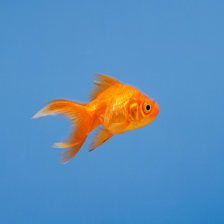

In [ ]:
#testing to see if the model works with an image of a hammer

gf = Image.open('/content/goldfiah.jpeg').resize((224,224))
gf

In [ ]:
#scale (normalize)

gf = np.array(gf)/255.0
gf.shape

(224, 224, 3)

In [ ]:
pred = gf[np.newaxis, ...]

In [ ]:
classifier.predict(pred)

1/1 [==============================] - 0s 66ms/step


array([[ 0.22155139,  1.9346424 , 10.463345  , ..., -2.4875102 ,
        -0.74666315,  0.5528737 ]], dtype=float32)

In [ ]:
#each class probability is shown above

In [ ]:
result = np.argmax(classifier.predict(pred))
result

1/1 [==============================] - 0s 58ms/step


2

In [ ]:
# the 2nd class is indeed goldfish

Classifying Flowers

In [4]:
#download dataset

dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

228813984/228813984 [==============================] - 5s 0us/step


In [ ]:
from pathlib import Path

data_dir = Path("/content/datasets/flower_photos")

In [ ]:
import random

# I am randomly reducing the size for memory saving purposes
flowers_images_dict = {
    'roses': random.sample(list(data_dir.glob('roses/*')), 200),
    'daisy': random.sample(list(data_dir.glob('daisy/*')), 200),
    'dandelion': random.sample(list(data_dir.glob('dandelion/*')), 200),
    'sunflowers': random.sample(list(data_dir.glob('sunflowers/*')), 200),
    'tulips': random.sample(list(data_dir.glob('tulips/*')), 200),
}

In [ ]:
#number of images (original dataset)
len(list(data_dir.glob('roses/*'))) + len(list(data_dir.glob('daisy/*'))) + len(list(data_dir.glob('dandelion/*'))) + len(list(data_dir.glob('sunflowers/*'))) + len(list(data_dir.glob('tulips/*')))

3670

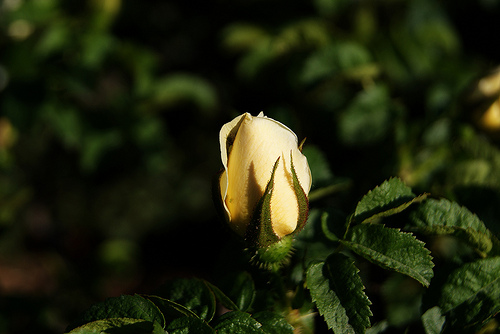

In [ ]:
Image.open(str(list(data_dir.glob('roses/*'))[1]))

In [ ]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [ ]:
sample_img = cv2.imread(str(flowers_images_dict['roses'][0]))
sample_img.shape

(334, 500, 3)

In [ ]:
sample_img = cv2.resize(sample_img,(224,224))
sample_img.shape

(224, 224, 3)

In [ ]:
# so we do this for all images and set X and y
X, y = [], []

for names, images in flowers_images_dict.items():
  for image in images:
    img = cv2.imread(str(image))
    img = cv2.resize(img,(224,224))
    X.append(img)
    y.append(flowers_labels_dict[names])

array([[[45, 54, 53],
        [48, 53, 55],
        [44, 52, 59],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[44, 52, 55],
        [48, 53, 55],
        [45, 53, 58],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[46, 53, 58],
        [46, 54, 53],
        [44, 53, 55],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       ...,

       [[ 1, 17, 15],
        [ 1, 20, 14],
        [ 0, 19, 13],
        ...,
        [ 5,  8, 14],
        [ 5,  7, 18],
        [ 6,  8, 17]],

       [[ 1, 19, 16],
        [ 4, 23, 23],
        [ 0, 22, 17],
        ...,
        [ 5,  8, 13],
        [ 6,  9, 16],
        [ 6, 10, 14]],

       [[ 0, 20, 17],
        [ 1, 20, 18],
        [ 2, 25, 20],
        ...,
        [ 9, 14, 16],
        [13, 14, 19],
        [14, 17, 22]]], dtype=uint8)
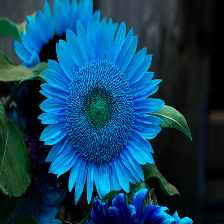

In [ ]:
X[2345]

In [ ]:
y[2345]

3

In [ ]:
X = np.array(X)
y = np.array(y)

In [ ]:
#split the data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
#scale the train set
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

array([[[206, 188, 204],
        [214, 197, 211],
        [217, 200, 213],
        ...,
        [249, 241, 241],
        [244, 236, 236],
        [238, 230, 230]],

       [[208, 191, 205],
        [216, 199, 213],
        [219, 203, 215],
        ...,
        [248, 243, 242],
        [246, 239, 238],
        [241, 233, 233]],

       [[209, 192, 206],
        [217, 200, 213],
        [222, 207, 216],
        ...,
        [250, 245, 244],
        [248, 242, 242],
        [246, 239, 238]],

       ...,

       [[  7,  20,  18],
        [  3,  15,  14],
        [  0,  11,   8],
        ...,
        [251, 247, 246],
        [251, 247, 246],
        [250, 246, 245]],

       [[  8,  16,  12],
        [  6,  16,  14],
        [  2,  10,   9],
        ...,
        [251, 247, 246],
        [252, 248, 247],
        [252, 248, 246]],

       [[  7,  13,   9],
        [  7,  16,  14],
        [  3,  11,  11],
        ...,
        [251, 247, 246],
        [252, 248, 247],
        [252, 248, 247]]], dtype=uint8)
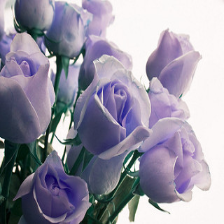

In [ ]:
# check if the model can classify a sample flower image correctly
X_train[5]

In [ ]:
import cv2
import numpy as np


img = np.expand_dims(X_train[5]/255, axis=0)

# Make prediction
pred = classifier.predict(img)
result = np.argmax(pred)
result


1/1 [==============================] - 0s 57ms/step


460

In [ ]:
#the model will not be able to classify well because it only has one type of flower in it and is not specific for flower classification

Now we will freeze the last layer to avoid prediction on 1000 classes

In [ ]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4" #link to the model without top layer

pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False) #trainable=False: model's parameters will remain frozen and unchanged during training, effectively using the pre-trained weights as they are


In [ ]:
#creating our model with adding the specific last layer on top of the pretrained model
num_of_flowers = 5

model = tf.keras.Sequential([
  pretrained_model_without_top_layer,
  tf.keras.layers.Dense(num_of_flowers)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 2264389 (8.64 MB)
Trainable params: 6405 (25.02 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [ ]:
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

model.fit(X_train_scaled, y_train, epochs=5)

Epoch 1/5
24/24 [==============================] - 35s 1s/step - loss: 1.4172 - acc: 0.4267
Epoch 2/5
24/24 [==============================] - 27s 1s/step - loss: 0.7040 - acc: 0.7493
Epoch 3/5
24/24 [==============================] - 27s 1s/step - loss: 0.5105 - acc: 0.8253
Epoch 4/5
24/24 [==============================] - 28s 1s/step - loss: 0.4034 - acc: 0.8653
Epoch 5/5
24/24 [==============================] - 33s 1s/step - loss: 0.3405 - acc: 0.9000


In [ ]:
model.evaluate(X_test_scaled,y_test)

8/8 [==============================] - 10s 1s/step - loss: 0.4681 - acc: 0.8360


[0.46807000041007996, 0.8360000252723694]

## Conclusion:
We received a very good accuracy of 0.9 only with 1000 samples (750 in train set) and only with 5 epoches. This shows the power of transfer learning.

## Now let's do it again on another dataset to classify cats & dogs

In [1]:
from google.colab import files
files.upload()

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d razinw/dog-vs-cat

Saving kaggle.json to kaggle.json
 99% 409M/412M [00:13<00:00, 32.9MB/s]
100% 412M/412M [00:13<00:00, 32.3MB/s]


In [4]:
!unzip /content/dog-vs-cat.zip

Archive:  /content/dog-vs-cat.zip
  inflating: dogvscat/test/0/250.jpg  
  inflating: dogvscat/test/0/251.jpg  
  inflating: dogvscat/test/0/252.jpg  
  inflating: dogvscat/test/0/253.jpg  
  inflating: dogvscat/test/0/254.jpg  
  inflating: dogvscat/test/0/255.jpg  
  inflating: dogvscat/test/0/256.jpg  
  inflating: dogvscat/test/0/257.jpg  
  inflating: dogvscat/test/0/258.jpg  
  inflating: dogvscat/test/0/259.jpg  
  inflating: dogvscat/test/0/260.jpg  
  inflating: dogvscat/test/0/261.jpg  
  inflating: dogvscat/test/0/262.jpg  
  inflating: dogvscat/test/0/263.jpg  
  inflating: dogvscat/test/0/264.jpg  
  inflating: dogvscat/test/0/265.jpg  
  inflating: dogvscat/test/0/266.jpg  
  inflating: dogvscat/test/0/267.jpg  
  inflating: dogvscat/test/0/268.jpg  
  inflating: dogvscat/test/0/269.jpg  
  inflating: dogvscat/test/0/270.jpg  
  inflating: dogvscat/test/0/271.jpg  
  inflating: dogvscat/test/0/272.jpg  
  inflating: dogvscat/test/0/273.jpg  
  inflating: dogvscat/test/0/2

In [48]:
from pathlib import Path

train_dir = Path("/content/dogvscat/train")

In [6]:
cat_dog_dict = {
    'cat': list(train_dir.glob('0/*')),
    'dog': list(train_dir.glob('1/*'))
}

In [7]:
labels_dict = {
    'cat': 0,
    'dog': 1
}

array([[[110, 154, 183],
        [114, 157, 184],
        [107, 152, 179],
        ...,
        [128, 174, 215],
        [115, 168, 211],
        [122, 173, 216]],

       [[103, 156, 183],
        [107, 156, 182],
        [109, 157, 181],
        ...,
        [126, 174, 210],
        [118, 173, 212],
        [120, 172, 213]],

       [[ 98, 155, 180],
        [108, 160, 183],
        [117, 166, 188],
        ...,
        [126, 169, 208],
        [123, 172, 210],
        [118, 167, 205]],

       ...,

       [[ 18,  24,  19],
        [ 20,  26,  21],
        [ 26,  32,  27],
        ...,
        [177, 244, 253],
        [175, 244, 253],
        [176, 245, 254]],

       [[ 22,  26,  20],
        [ 24,  28,  23],
        [ 23,  27,  22],
        ...,
        [177, 244, 253],
        [176, 245, 254],
        [174, 246, 254]],

       [[ 19,  20,  18],
        [ 25,  26,  24],
        [ 24,  25,  23],
        ...,
        [174, 246, 254],
        [176, 245, 254],
        [178, 245, 254]]], dtype=uint8)
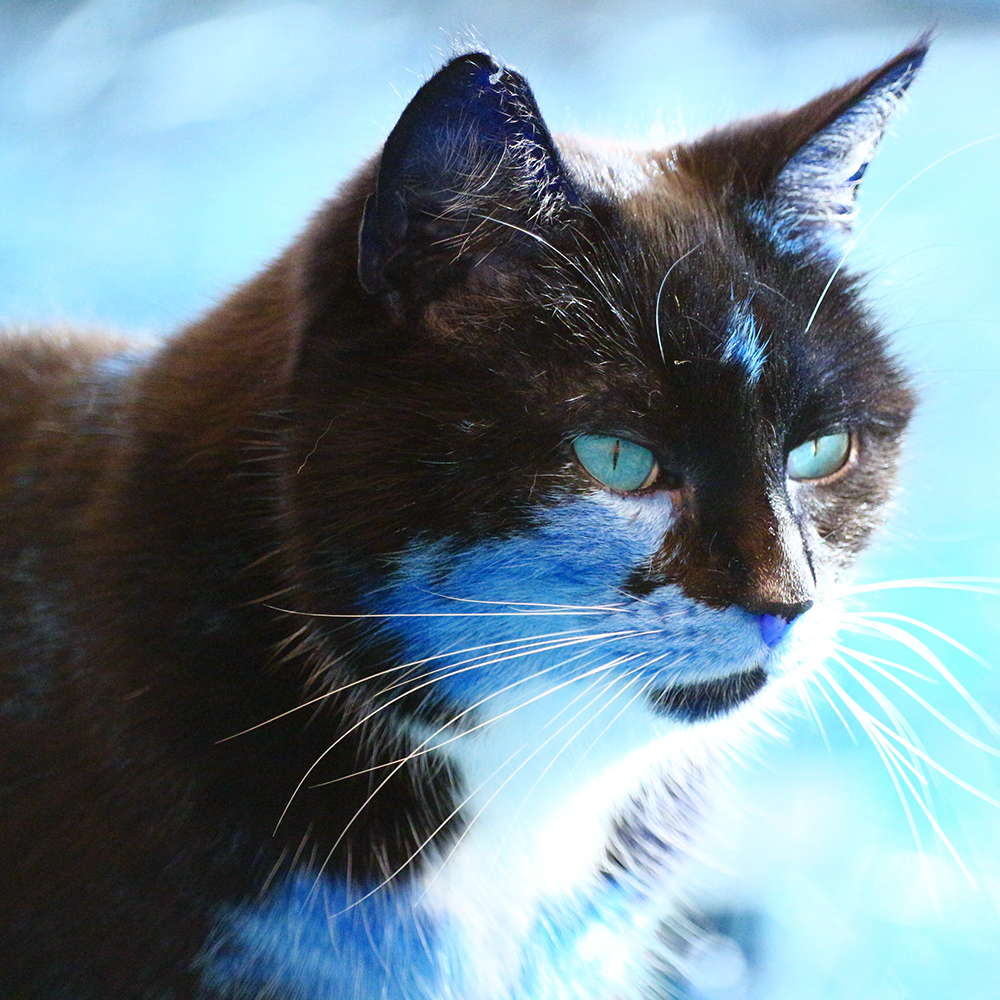

In [10]:
sample_img = cv2.imread(str(cat_dog_dict['cat'][0]))
sample_img

In [11]:
sample_img.shape

(1000, 1000, 3)

array([[[113, 162, 185],
        [106, 153, 177],
        [115, 155, 180],
        ...,
        [112, 168, 207],
        [106, 166, 206],
        [125, 171, 209]],

       [[121, 160, 191],
        [122, 159, 187],
        [117, 154, 183],
        ...,
        [119, 166, 205],
        [129, 170, 204],
        [124, 167, 208]],

       [[123, 163, 189],
        [123, 163, 191],
        [117, 160, 187],
        ...,
        [117, 160, 202],
        [114, 162, 200],
        [113, 161, 201]],

       ...,

       [[ 23,  23,  21],
        [ 19,  22,  21],
        [ 23,  26,  22],
        ...,
        [176, 244, 253],
        [181, 246, 254],
        [178, 245, 254]],

       [[ 21,  25,  23],
        [ 22,  27,  27],
        [ 14,  20,  16],
        ...,
        [182, 245, 255],
        [183, 246, 255],
        [182, 245, 255]],

       [[ 24,  29,  24],
        [ 23,  25,  23],
        [ 20,  22,  18],
        ...,
        [178, 246, 254],
        [173, 246, 254],
        [176, 244, 253]]], dtype=uint8)
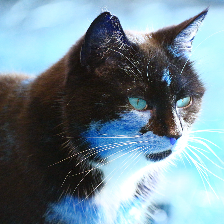

In [13]:
sample_img = cv2.resize(sample_img,(224,224))
sample_img

In [14]:
# so we do this for all images and set X and y
X, y = [], []

for names, images in cat_dog_dict.items():
  for image in images:
    img = cv2.imread(str(image))
    img = cv2.resize(img,(224,224))
    X.append(img)
    y.append(labels_dict[names])

array([[[ 42,  47,  59],
        [ 50,  58,  72],
        [ 30,  36,  49],
        ...,
        [ 18,  31,  36],
        [ 17,  31,  37],
        [ 13,  25,  31]],

       [[ 28,  33,  46],
        [ 30,  38,  51],
        [ 38,  44,  57],
        ...,
        [ 15,  27,  33],
        [ 22,  34,  40],
        [ 19,  31,  37]],

       [[ 41,  47,  60],
        [ 42,  48,  62],
        [ 46,  52,  65],
        ...,
        [ 13,  22,  25],
        [ 14,  28,  34],
        [ 17,  29,  33]],

       ...,

       [[ 55,  66,  71],
        [ 95, 105, 109],
        [ 93, 104, 109],
        ...,
        [117, 139, 143],
        [ 29,  40,  43],
        [115, 140, 143]],

       [[ 85,  94, 101],
        [150, 163, 167],
        [ 51,  60,  64],
        ...,
        [ 33,  46,  50],
        [ 34,  48,  50],
        [ 57,  80,  83]],

       [[ 60,  71,  77],
        [ 75,  85,  88],
        [ 43,  49,  53],
        ...,
        [ 47,  69,  74],
        [ 95, 111, 115],
        [  9,  18,  23]]], dtype=uint8)
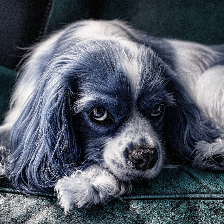

In [20]:
X[400]

In [21]:
y[400]

1

In [22]:
X = np.array(X)
y = np.array(y)

In [23]:
#split the data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [24]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [26]:
len(X_train_scaled)

400

In [27]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4" #link to the model without top layer

pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False) #trainable=False: model's parameters will remain frozen and unchanged during training, effectively using the pre-trained weights as they are


In [30]:
#creating our model with adding the specific last layer on top of the pretrained model

model = tf.keras.Sequential([
  pretrained_model_without_top_layer,
  tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense_1 (Dense)             (None, 1)                 1281      
                                                                 
Total params: 2259265 (8.62 MB)
Trainable params: 1281 (5.00 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [31]:
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
  metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=5)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5818: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


13/13 [==============================] - 8s 97ms/step - loss: 0.7106 - accuracy: 0.5675
Epoch 2/5
13/13 [==============================] - 1s 39ms/step - loss: 0.3137 - accuracy: 0.9175
Epoch 3/5
13/13 [==============================] - 1s 39ms/step - loss: 0.1830 - accuracy: 0.9650
Epoch 4/5
13/13 [==============================] - 1s 39ms/step - loss: 0.1330 - accuracy: 0.9750
Epoch 5/5
13/13 [==============================] - 1s 40ms/step - loss: 0.1072 - accuracy: 0.9825


In [32]:
#Wow this is amazing! Only 5 epoches and 200 sample train for each class!

In [33]:
model.evaluate(X_test_scaled,y_test)

4/4 [==============================] - 2s 275ms/step - loss: 0.1353 - accuracy: 0.9800


[0.13527634739875793, 0.9800000190734863]

In [35]:
#Now let's test the model on an out of sample dog image

In [34]:
image_path = "/content/dog_test.jpg"
image = Image.open(image_path)
image = image.resize((224, 224))  # Resize the image to match the input size of your model
image_array = np.array(image) / 255.0

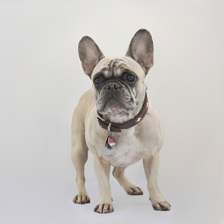

In [37]:
image

In [39]:
image_array = np.expand_dims(image_array, axis=0)
predicted_probabilities = model.predict(image_array)

1/1 [==============================] - 1s 1s/step


In [40]:
predicted_class = 1 if predicted_probabilities[0][0] > 0.5 else 0

print("Predicted class:", predicted_class)
print("Predicted probabilities:", predicted_probabilities)

Predicted class: 1
Predicted probabilities: [[0.7273196]]


In [41]:
#Yes it is a dog!

In [44]:
#And on a cat:
image_path = "/content/cat_sample.jpg"
image = Image.open(image_path)
image = image.resize((224, 224))  # Resize the image to match the input size of your model
image_array = np.array(image) / 255.0

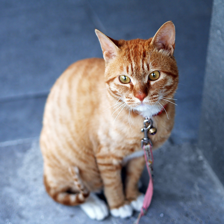

In [45]:
image

In [46]:
image_array = np.expand_dims(image_array, axis=0)
predicted_probabilities = model.predict(image_array)

1/1 [==============================] - 0s 52ms/step


In [47]:
predicted_class = 1 if predicted_probabilities[0][0] > 0.5 else 0

print("Predicted class:", predicted_class)
print("Predicted probabilities:", predicted_probabilities)

Predicted class: 0
Predicted probabilities: [[0.0073166]]


In [ ]:
#Yes it is a cat!